In [1]:
from src.data.create_corpus_dataset import create_dataset, DatasetConfig, UtteranceType
import os
from datasets import load_from_disk

# load dataset
dataset_folder = "../../data/processed/with_context"
dataset_path = os.path.join(dataset_folder, "corpus_dataset_v2")

if not os.path.exists(dataset_path):
    # Beispiel zum Erstellen eines Datensatzes. Mögliche Optionen von DatasetConfig sind im DocString beschrieben.
    create_dataset(
        DatasetConfig(
            dataset_path=dataset_path,
            project_dir="../../",
            utterance_type=UtteranceType.User,
            eval_size=0.5,
            validation_test_ratio=0.5
        )
    )

# Beispiel zum Laden des Datensatzes + collate_function des DataLoaders um dynamisch ein Subset der negative passages zu laden.
loaded_dataset = load_from_disk(dataset_path)

/home/christian/PycharmProjects/ethikchat-experiment-argument-classification/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
from ethikchat_argtoolkit.Dialogue.discussion_szenario import DiscussionSzenario
from ethikchat_argtoolkit.ArgumentGraph.response_template_collection import ResponseTemplateCollection


# load argument_graphs
def load_response_template_collection(topic: str) -> ResponseTemplateCollection:
    return ResponseTemplateCollection.from_csv_files(
        templates_directory_path=f"../../data/external/argument_graphs/szenario_{topic}"
    )

argument_graph_med = load_response_template_collection("s1")
argument_graph_jur = load_response_template_collection("s2")
argument_graph_auto = load_response_template_collection("s3")
argument_graph_ref = load_response_template_collection("s4")

argument_graphs = {
    DiscussionSzenario.MEDAI: argument_graph_med,
    DiscussionSzenario.JURAI: argument_graph_jur,
    DiscussionSzenario.AUTOAI: argument_graph_auto,
    DiscussionSzenario.REFAI: argument_graph_ref
}


Loading templates from file ../../data/external/argument_graphs/szenario_s1/templates_introductions.csv ... Done
Loading templates from file ../../data/external/argument_graphs/szenario_s1/templates_transitions.csv ... Done
Loading templates from file ../../data/external/argument_graphs/szenario_s1/templates_groups.csv ... Done
Loading templates from file ../../data/external/argument_graphs/szenario_s1/templates_zargs.csv ... Done
Loading templates from file ../../data/external/argument_graphs/szenario_s1/templates_nzargs.csv ... Done
Loading templates from file ../../data/external/argument_graphs/szenario_s1/templates_faq.csv ... Done
Loading samples from file ../../data/external/argument_graphs/szenario_s1/samples_collection.csv ... Done


In [5]:
labels_per_scenario = {}
for scenario, argument_graph in argument_graphs.items():
    labels_per_scenario[scenario] = argument_graph.arguments_labels.union(argument_graph.faq_question_labels)
labels_per_scenario

{<DiscussionSzenario.MEDAI: 'MEDAI'>: {'FAQ.1',
  'FAQ.2',
  'FAQ.3',
  'FAQ.4',
  'FAQ.5',
  'FAQ.6',
  'FAQ.7',
  'FAQ.8',
  'NZ.K1',
  'NZ.K1-1',
  'NZ.K10',
  'NZ.K10-1',
  'NZ.K11',
  'NZ.K3',
  'NZ.K3-1',
  'NZ.K4',
  'NZ.K4-1',
  'NZ.K6',
  'NZ.K6-1',
  'NZ.K8',
  'NZ.K8-1',
  'NZ.K9',
  'NZ.K9-1',
  'NZ.P1',
  'NZ.P1-1',
  'Z.K1',
  'Z.K1-1',
  'Z.K1-2',
  'Z.K10',
  'Z.K10-1',
  'Z.K10-2',
  'Z.K11',
  'Z.K11-1',
  'Z.K12',
  'Z.K12-1',
  'Z.K13',
  'Z.K13-1',
  'Z.K14',
  'Z.K14-1',
  'Z.K15',
  'Z.K15-1',
  'Z.K16',
  'Z.K16-1',
  'Z.K18',
  'Z.K18-1',
  'Z.K19',
  'Z.K19-1',
  'Z.K2',
  'Z.K2-4',
  'Z.K20',
  'Z.K3',
  'Z.K3-1',
  'Z.K3-1-1',
  'Z.K3-2',
  'Z.K4',
  'Z.K4-1',
  'Z.K5',
  'Z.K5-1',
  'Z.K6',
  'Z.K6-1',
  'Z.K7',
  'Z.K7-1',
  'Z.K8',
  'Z.K8-1',
  'Z.K8-2',
  'Z.K9',
  'Z.K9-1',
  'Z.P1',
  'Z.P1-1',
  'Z.P1-1-1',
  'Z.P2',
  'Z.P3',
  'Z.P3-1',
  'Z.P3-1-1',
  'Z.P3-2',
  'Z.P4',
  'Z.P4-1',
  'Z.P5',
  'Z.P5-1',
  'Z.P6',
  'Z.P6-1',
  'Z.P6-1-1',
  'Z.P7

In [4]:
passages = loaded_dataset['passages']
passages_df = passages.to_pandas()
counts = passages_df.groupby(["discussion_scenario", "label"]).size().unstack(fill_value=0)
counts

label,FAQ.1,FAQ.1-1,FAQ.2,FAQ.3,FAQ.4,FAQ.5,FAQ.6,FAQ.6-1,FAQ.7,FAQ.8,...,Z.P8,Z.P8-1,Z.P8-1-1,Z.P8-1-2,Z.P8-1-2-1,Z.P8-2,Z.P9,Z.P9-1,Z.P9-1-1,Z.P9-2
discussion_scenario,,,,,,,,,,,,,,,,,,,,,
AUTOAI,22,0,22,26,0,0,0,0,0,0,...,59,53,35,76,24,0,39,32,27,0
JURAI,29,0,27,28,28,29,23,0,0,0,...,48,27,0,0,0,32,0,0,0,0
MEDAI,27,1,39,39,42,25,25,1,41,27,...,0,0,0,0,0,0,0,0,0,0
REFAI,22,0,24,22,22,22,24,0,26,29,...,23,22,0,0,0,0,30,23,0,22


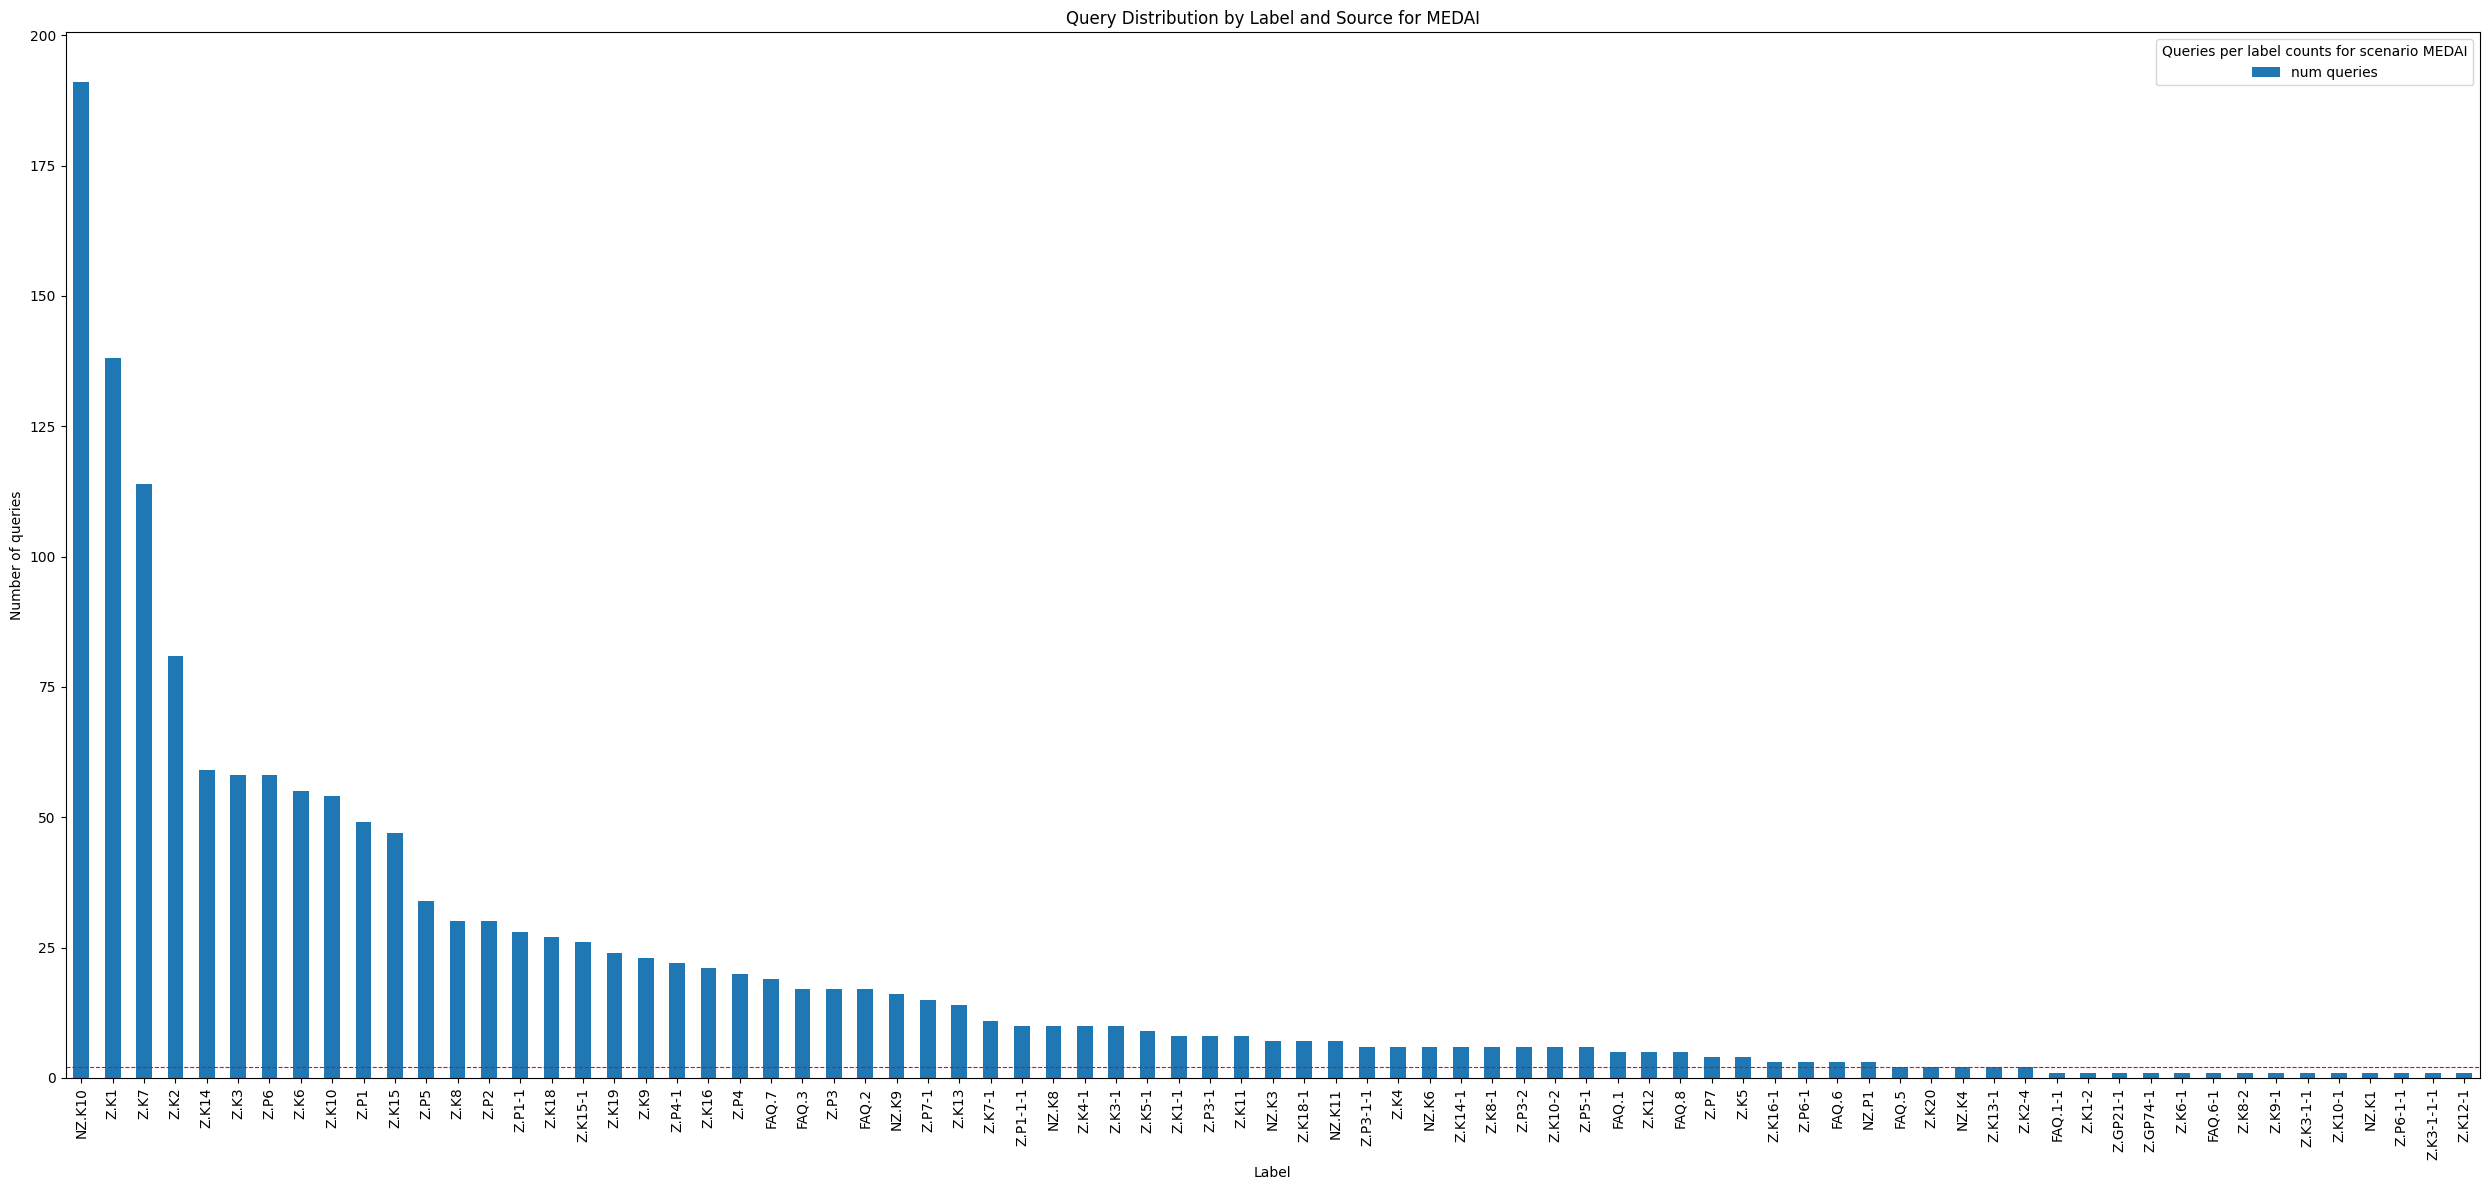

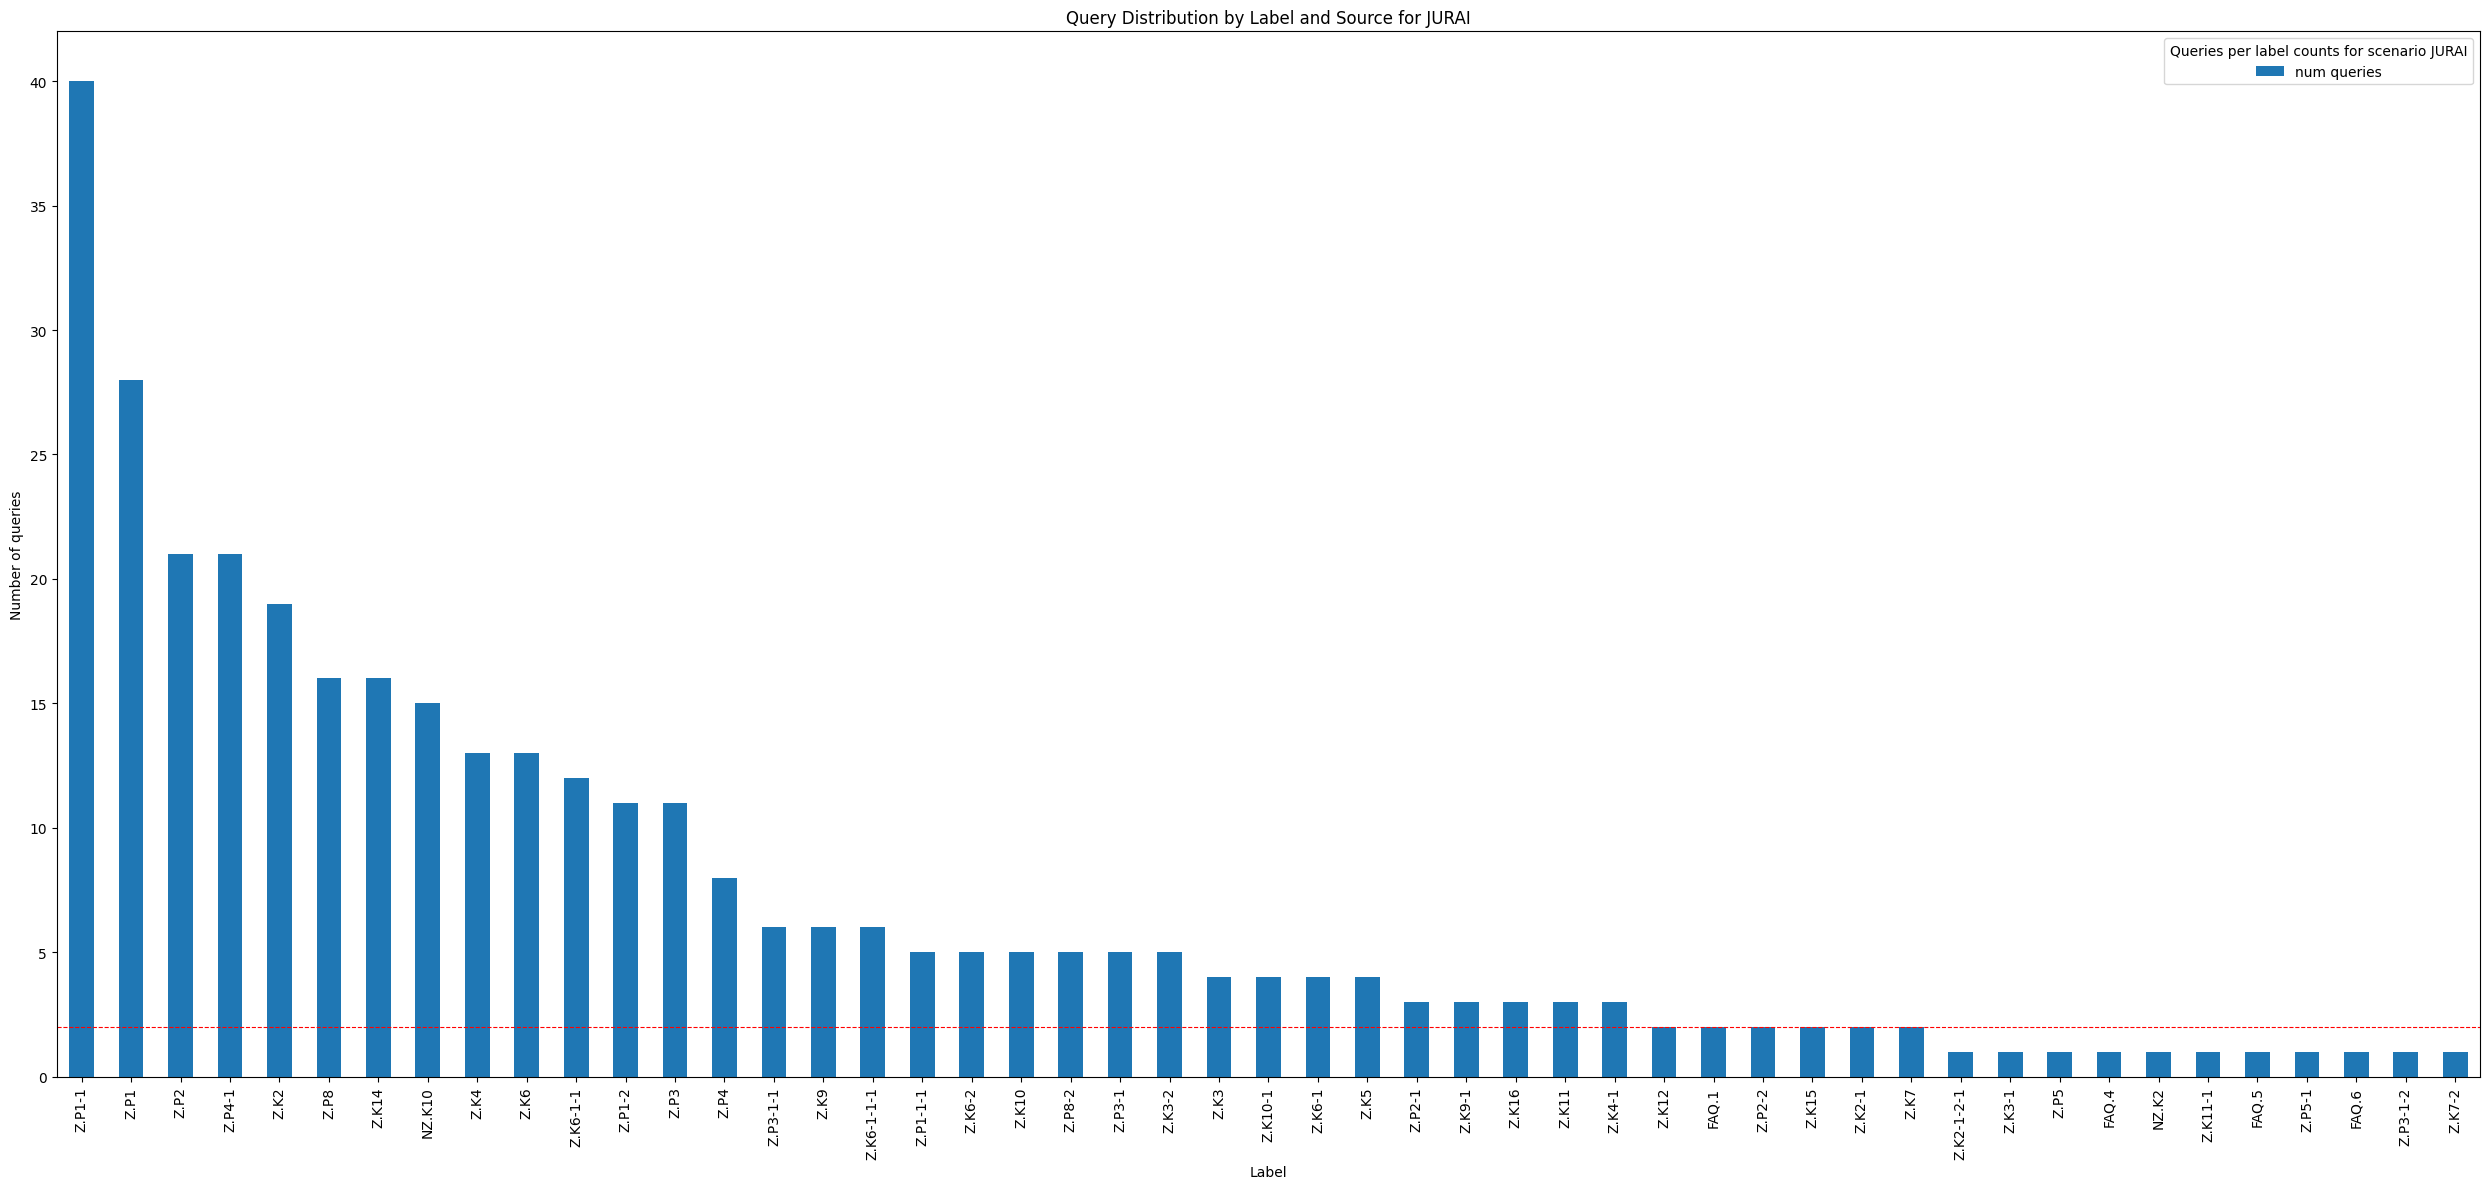

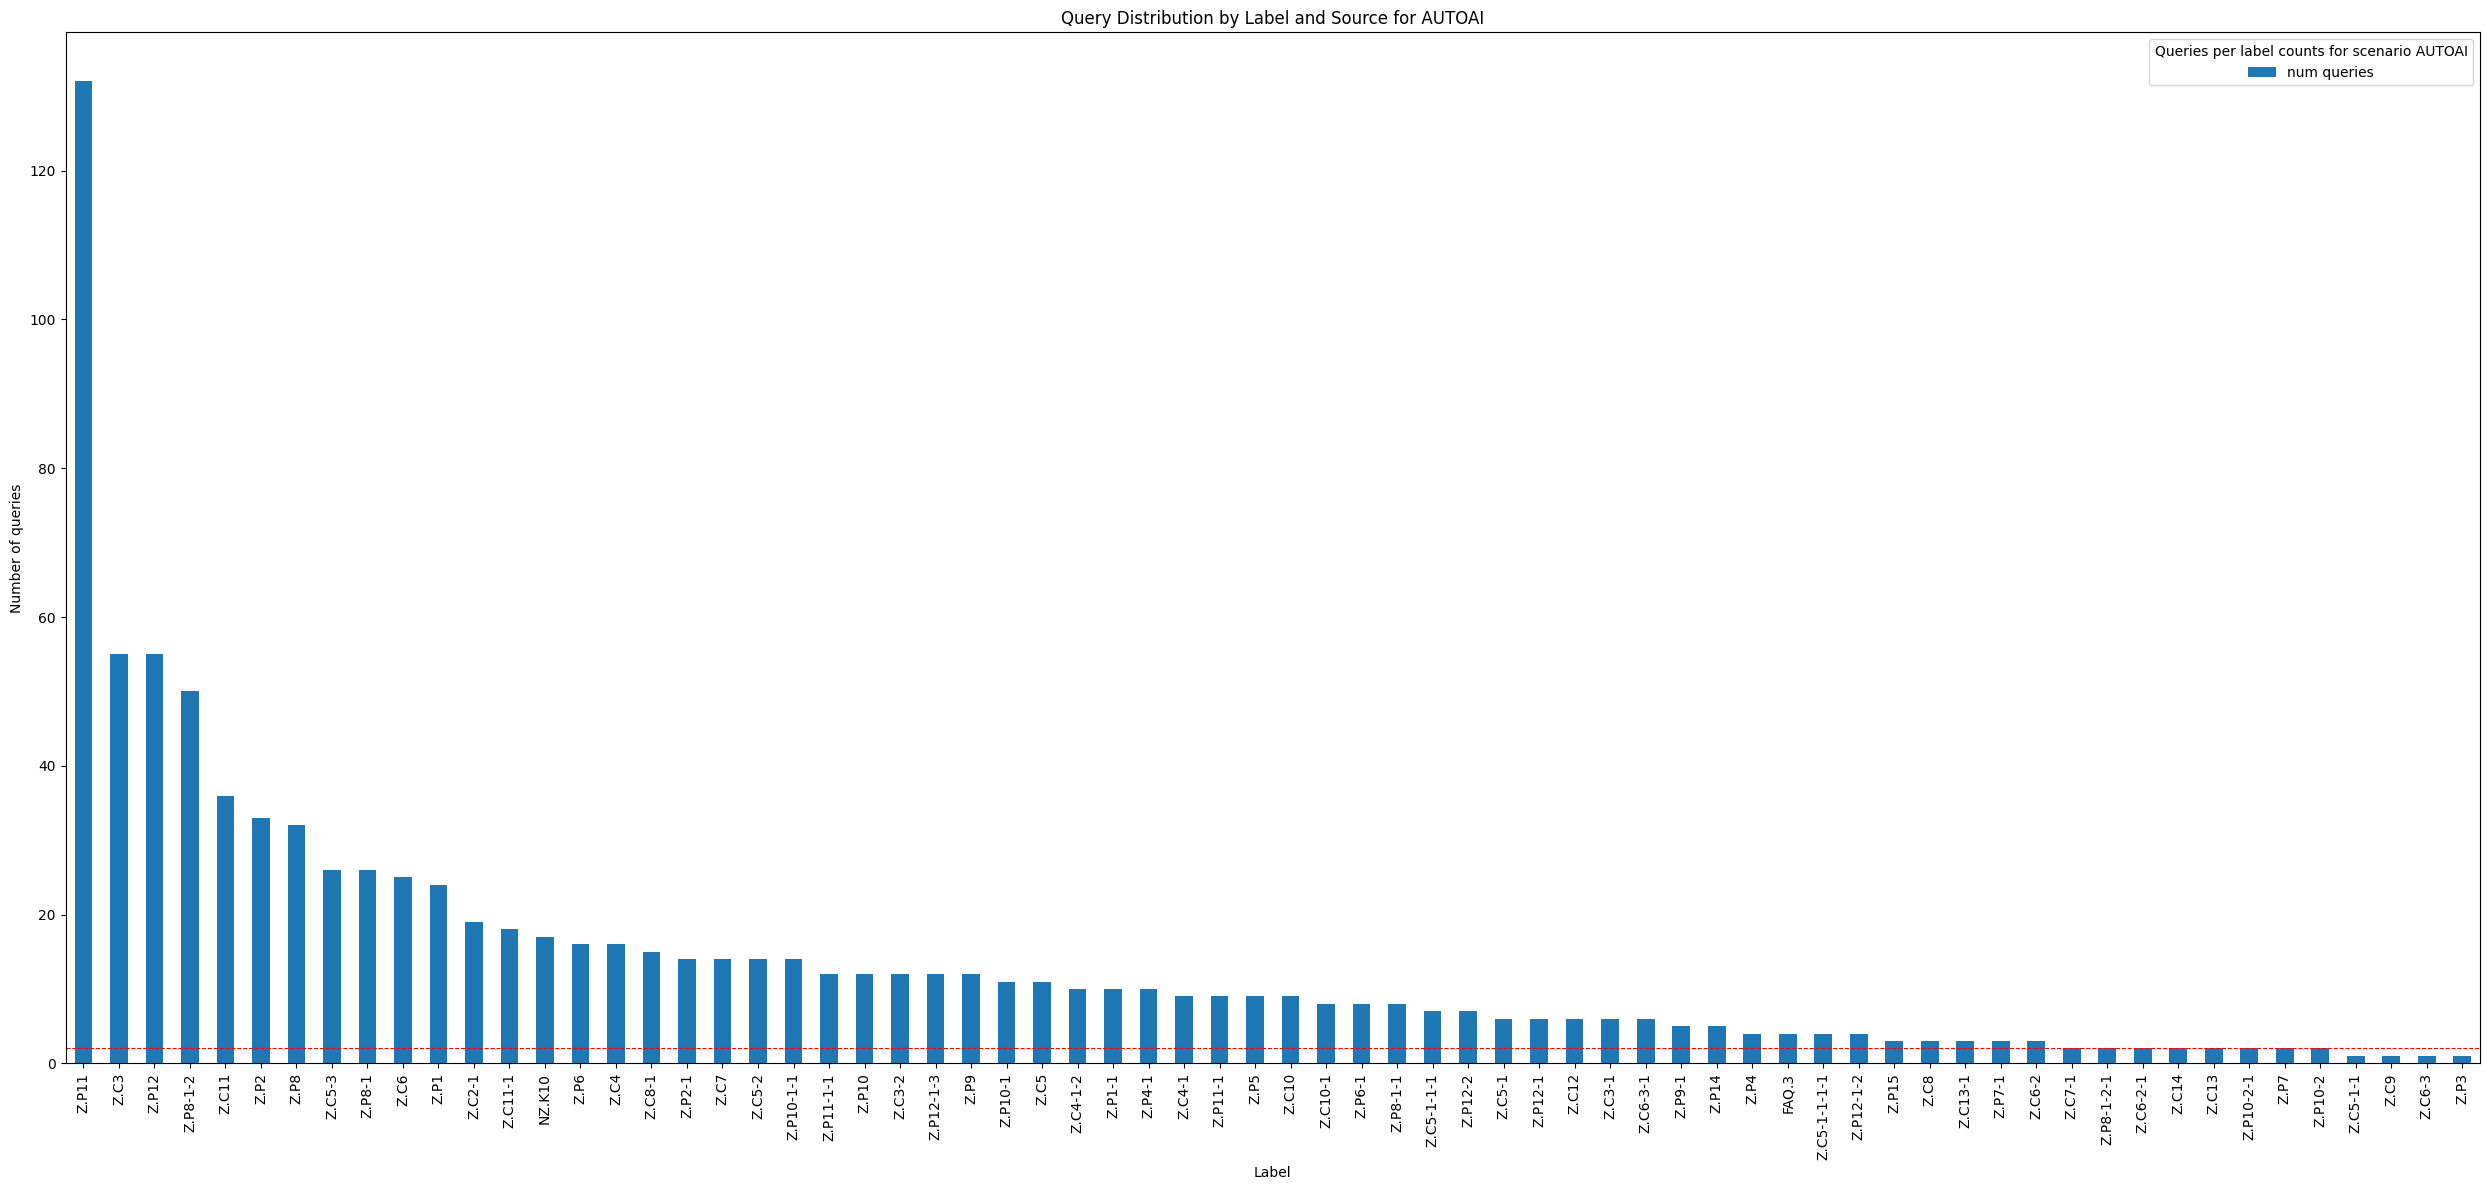

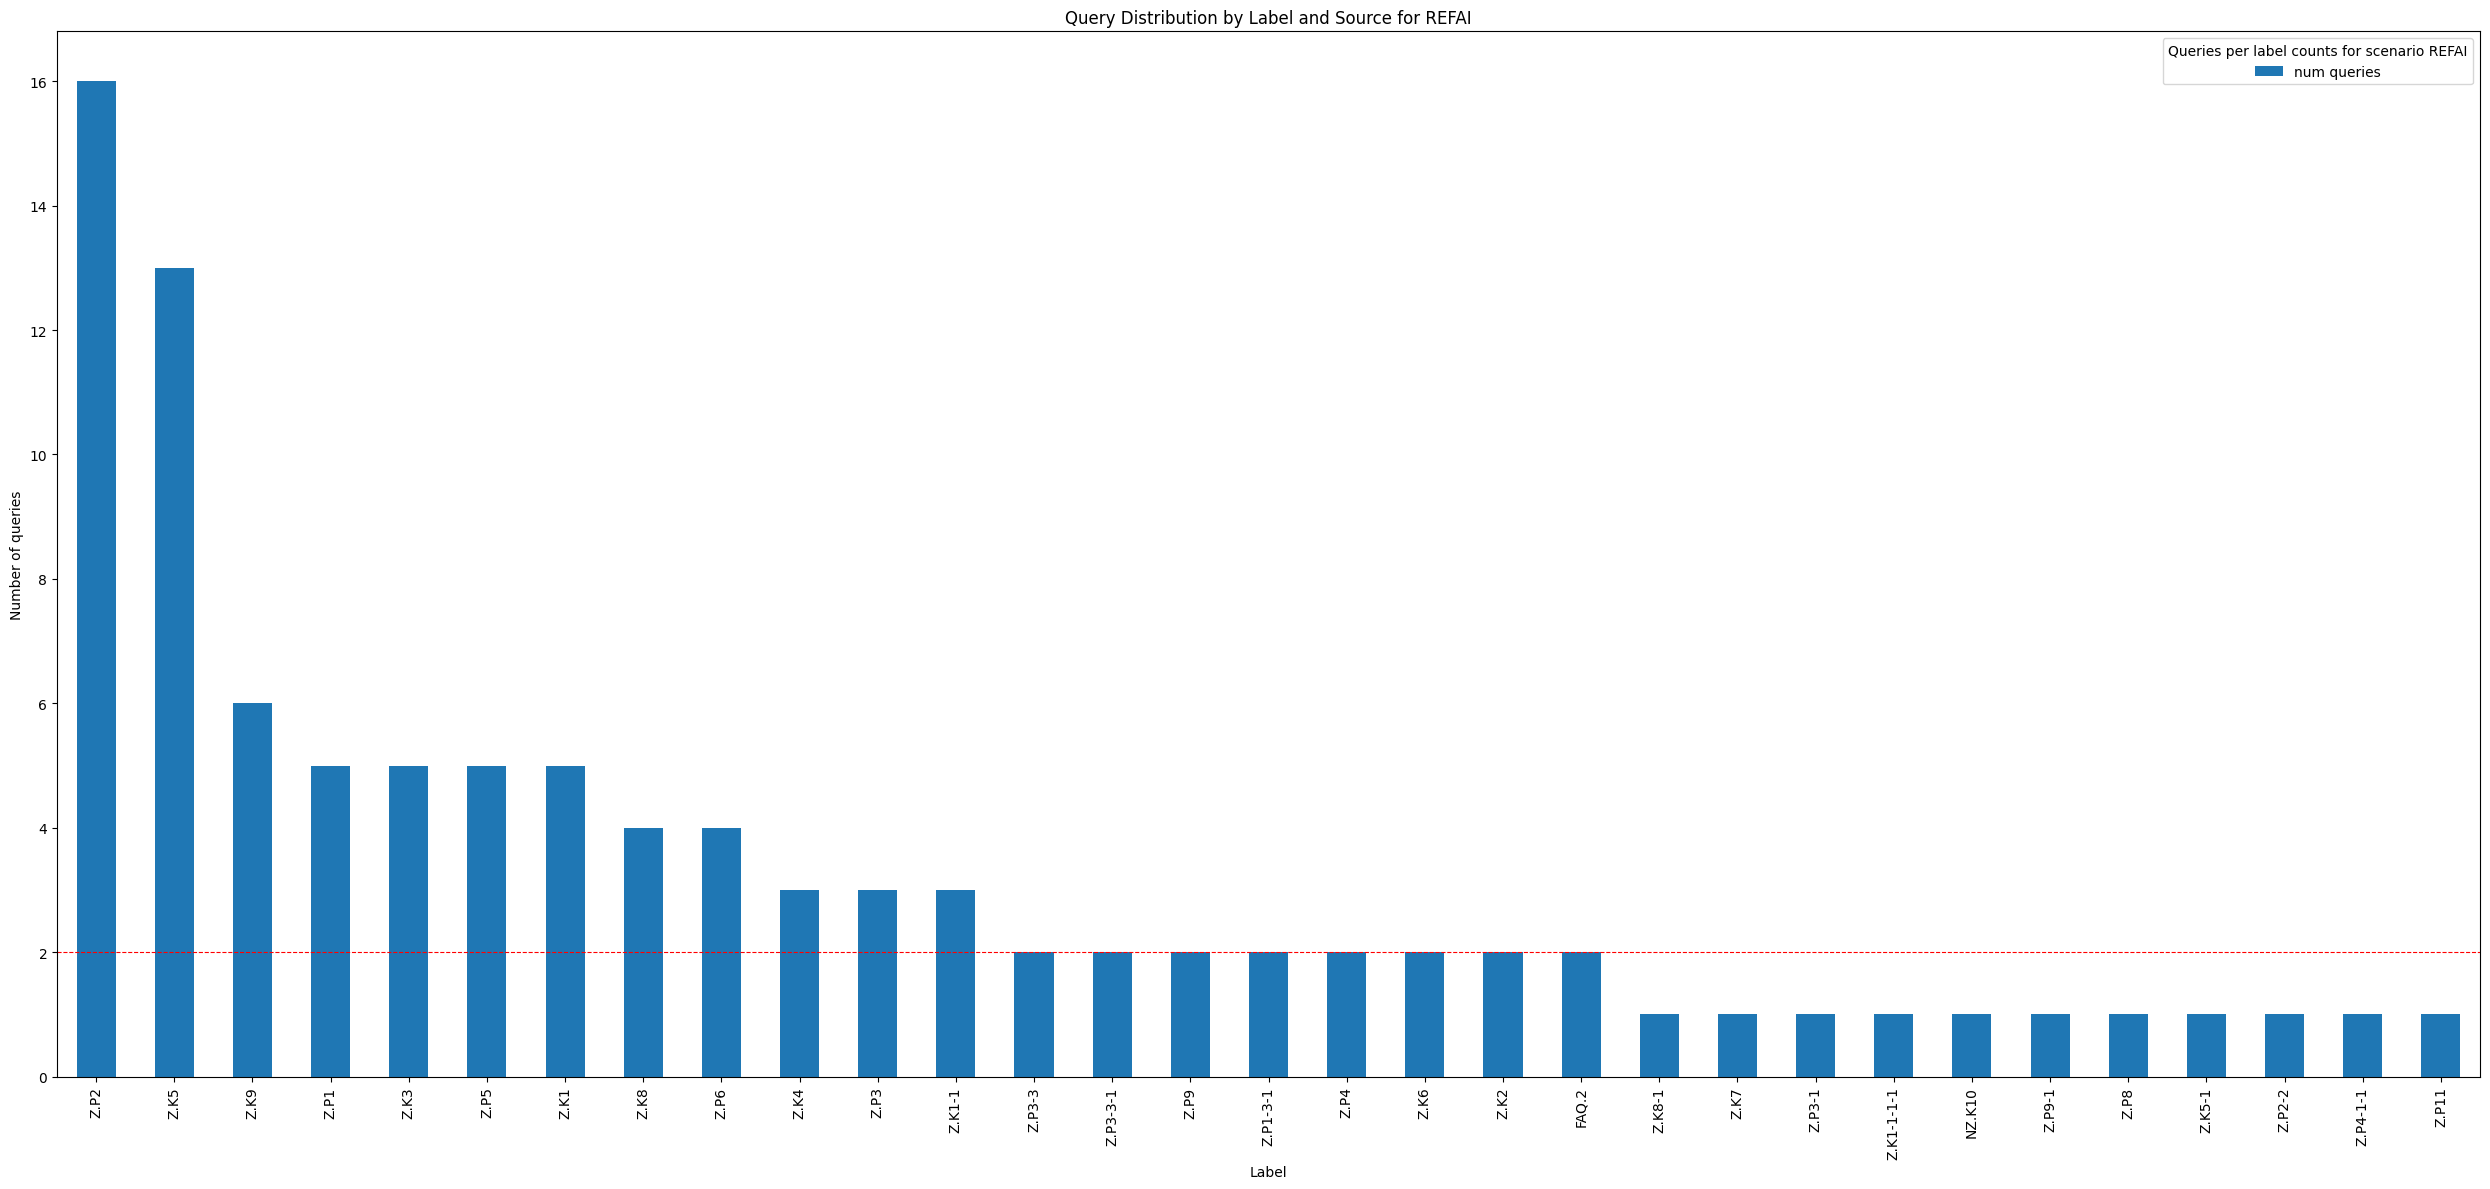

In [12]:
from collections import defaultdict
import matplotlib.pyplot as plt
import pandas as pd
queries = loaded_dataset["queries"]
queries_df = queries.to_pandas()

label_query_counts = defaultdict(lambda: defaultdict(int))
for idx, row in queries_df.iterrows():
    labels = row["labels"]
    scenario = row["discussion_scenario"]
    for label in labels:
        label_query_counts[scenario][label] += 1

horizontal_bars = [2]

for scenario, counts in label_query_counts.items():
    queries_counts_df = pd.DataFrame(counts.items(), columns=["label", "num queries"])
    queries_counts_df.sort_values("num queries", ascending=False, inplace=True)

    ax = queries_counts_df.plot(kind="bar", stacked=True, figsize=(25, 12), x="label")

    # Insert horizontal bars
    for bar_height in horizontal_bars:
        ax.axhline(y=bar_height, color='red', linestyle='--', linewidth=0.8)

    plt.xlabel("Label")
    plt.ylabel("Number of queries")
    plt.title(f"Query Distribution by Label and Source for {scenario}")
    plt.xticks(rotation=90)
    plt.legend(title=f"Queries per label counts for scenario {scenario}")
    plt.tight_layout()
    plt.show()
print("\n\n")



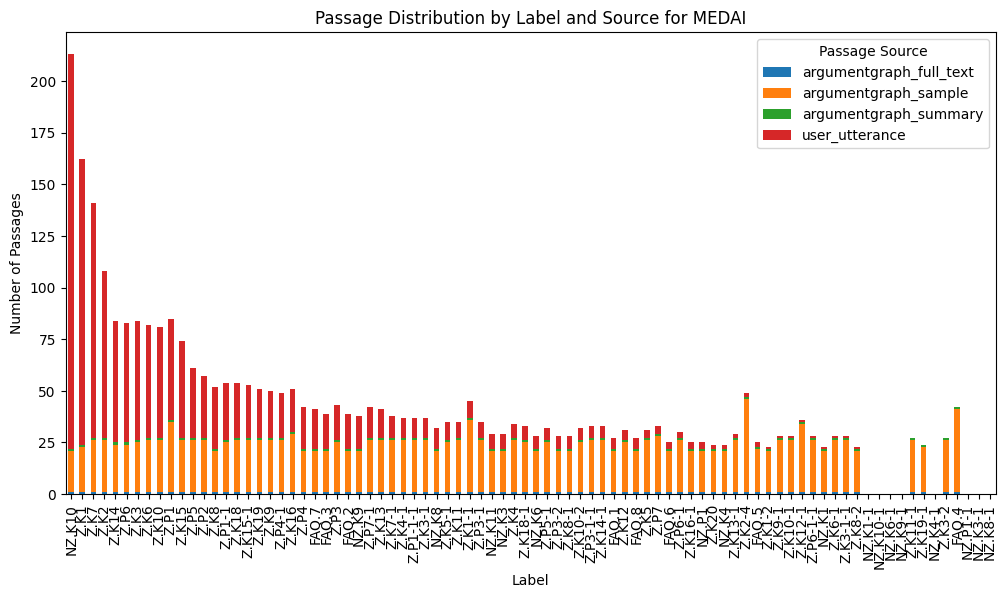

passage_source,argumentgraph_full_text,argumentgraph_sample,argumentgraph_summary,user_utterance
label,,,,
NZ.K10,1,20,1,191
Z.K1,1,22,1,138
Z.K7,1,25,1,114
Z.K2,1,25,1,81
Z.K14,1,23,1,59
...,...,...,...,...
Z.K3-2,1,25,1,0
FAQ.4,1,40,1,0
NZ.P1-1,0,0,0,0


{<DiscussionSzenario.MEDAI: 'MEDAI'>: [('Z.K11-1', 'user_utterance'),
  ('Z.K19-1', 'user_utterance'),
  ('Z.K3-2', 'user_utterance'),
  ('FAQ.4', 'user_utterance')]}

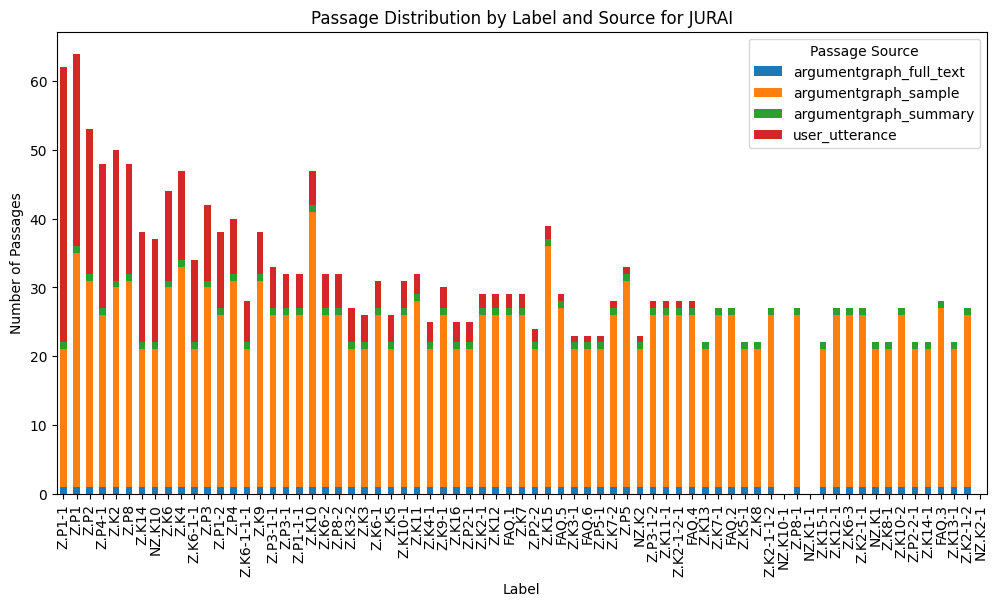

passage_source,argumentgraph_full_text,argumentgraph_sample,argumentgraph_summary,user_utterance
label,,,,
Z.P1-1,1,20,1,40
Z.P1,1,34,1,28
Z.P2,1,30,1,21
Z.P4-1,1,25,1,21
Z.K2,1,29,1,19
...,...,...,...,...
Z.K14-1,1,20,1,0
FAQ.3,1,26,1,0
Z.K13-1,1,20,1,0


{<DiscussionSzenario.MEDAI: 'MEDAI'>: [('Z.K11-1', 'user_utterance'),
  ('Z.K19-1', 'user_utterance'),
  ('Z.K3-2', 'user_utterance'),
  ('FAQ.4', 'user_utterance')],
 <DiscussionSzenario.JURAI: 'JURAI'>: [('Z.K13', 'user_utterance'),
  ('Z.K7-1', 'user_utterance'),
  ('FAQ.2', 'user_utterance'),
  ('Z.K5-1', 'user_utterance'),
  ('Z.K8', 'user_utterance'),
  ('Z.K2-1-1-2', 'user_utterance'),
  ('Z.P8-1', 'user_utterance'),
  ('Z.K15-1', 'user_utterance'),
  ('Z.K12-1', 'user_utterance'),
  ('Z.K6-3', 'user_utterance'),
  ('Z.K2-1-1', 'user_utterance'),
  ('NZ.K1', 'user_utterance'),
  ('Z.K8-1', 'user_utterance'),
  ('Z.K10-2', 'user_utterance'),
  ('Z.P2-2-1', 'user_utterance'),
  ('Z.K14-1', 'user_utterance'),
  ('FAQ.3', 'user_utterance'),
  ('Z.K13-1', 'user_utterance'),
  ('Z.K2-1-2', 'user_utterance')]}

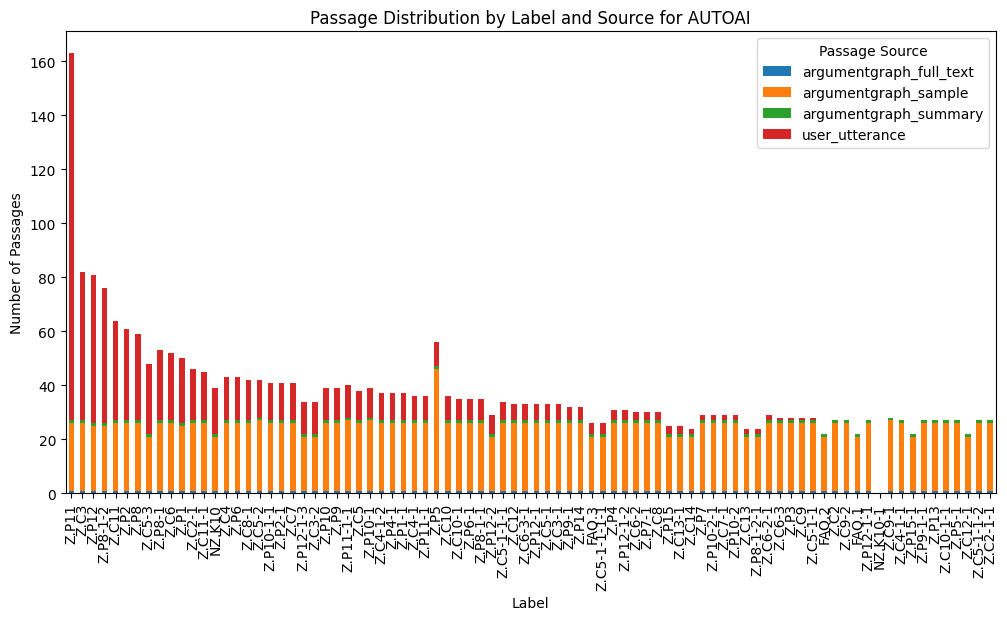

passage_source,argumentgraph_full_text,argumentgraph_sample,argumentgraph_summary,user_utterance
label,,,,
Z.P11,1,25,1,136
Z.C3,1,25,1,55
Z.P12,1,24,1,55
Z.P8-1-2,1,24,1,50
Z.C11,1,25,1,37
...,...,...,...,...
Z.C10-1-1,1,25,1,0
Z.P5-1,1,25,1,0
Z.C12-1,1,20,1,0


{<DiscussionSzenario.MEDAI: 'MEDAI'>: [('Z.K11-1', 'user_utterance'),
  ('Z.K19-1', 'user_utterance'),
  ('Z.K3-2', 'user_utterance'),
  ('FAQ.4', 'user_utterance')],
 <DiscussionSzenario.JURAI: 'JURAI'>: [('Z.K13', 'user_utterance'),
  ('Z.K7-1', 'user_utterance'),
  ('FAQ.2', 'user_utterance'),
  ('Z.K5-1', 'user_utterance'),
  ('Z.K8', 'user_utterance'),
  ('Z.K2-1-1-2', 'user_utterance'),
  ('Z.P8-1', 'user_utterance'),
  ('Z.K15-1', 'user_utterance'),
  ('Z.K12-1', 'user_utterance'),
  ('Z.K6-3', 'user_utterance'),
  ('Z.K2-1-1', 'user_utterance'),
  ('NZ.K1', 'user_utterance'),
  ('Z.K8-1', 'user_utterance'),
  ('Z.K10-2', 'user_utterance'),
  ('Z.P2-2-1', 'user_utterance'),
  ('Z.K14-1', 'user_utterance'),
  ('FAQ.3', 'user_utterance'),
  ('Z.K13-1', 'user_utterance'),
  ('Z.K2-1-2', 'user_utterance')],
 <DiscussionSzenario.AUTOAI: 'AUTOAI'>: [('FAQ.2', 'user_utterance'),
  ('Z.C2', 'user_utterance'),
  ('Z.C9-2', 'user_utterance'),
  ('FAQ.1', 'user_utterance'),
  ('Z.P12-1-1',

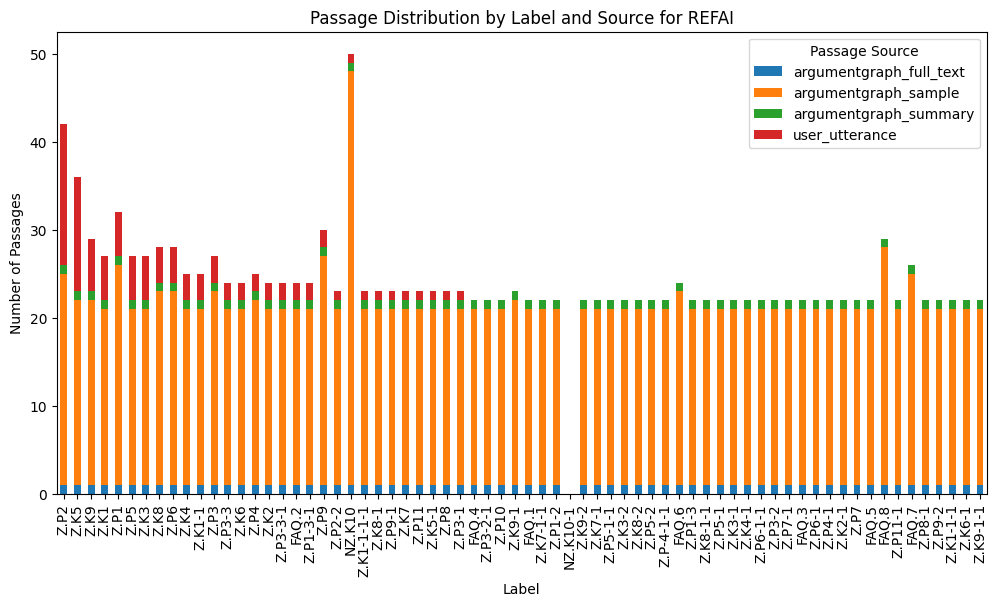

passage_source,argumentgraph_full_text,argumentgraph_sample,argumentgraph_summary,user_utterance
label,,,,
Z.P2,1,24,1,16
Z.K5,1,21,1,13
Z.K9,1,21,1,6
Z.K1,1,20,1,5
Z.P1,1,25,1,5
...,...,...,...,...
Z.P8-1,1,20,1,0
Z.P9-2,1,20,1,0
Z.K1-1-1,1,20,1,0


{<DiscussionSzenario.MEDAI: 'MEDAI'>: [('Z.K11-1', 'user_utterance'),
  ('Z.K19-1', 'user_utterance'),
  ('Z.K3-2', 'user_utterance'),
  ('FAQ.4', 'user_utterance')],
 <DiscussionSzenario.JURAI: 'JURAI'>: [('Z.K13', 'user_utterance'),
  ('Z.K7-1', 'user_utterance'),
  ('FAQ.2', 'user_utterance'),
  ('Z.K5-1', 'user_utterance'),
  ('Z.K8', 'user_utterance'),
  ('Z.K2-1-1-2', 'user_utterance'),
  ('Z.P8-1', 'user_utterance'),
  ('Z.K15-1', 'user_utterance'),
  ('Z.K12-1', 'user_utterance'),
  ('Z.K6-3', 'user_utterance'),
  ('Z.K2-1-1', 'user_utterance'),
  ('NZ.K1', 'user_utterance'),
  ('Z.K8-1', 'user_utterance'),
  ('Z.K10-2', 'user_utterance'),
  ('Z.P2-2-1', 'user_utterance'),
  ('Z.K14-1', 'user_utterance'),
  ('FAQ.3', 'user_utterance'),
  ('Z.K13-1', 'user_utterance'),
  ('Z.K2-1-2', 'user_utterance')],
 <DiscussionSzenario.AUTOAI: 'AUTOAI'>: [('FAQ.2', 'user_utterance'),
  ('Z.C2', 'user_utterance'),
  ('Z.C9-2', 'user_utterance'),
  ('FAQ.1', 'user_utterance'),
  ('Z.P12-1-1',

In [29]:
import matplotlib.pyplot as plt

def get_zero_count_labels(results):
    """
    For each discussion scenario, find all labels that have zero count for any passage source.

    Args:
    results (dict): Dictionary with discussion scenarios as keys and DataFrames as values.

    Returns:
    dict: Dictionary where keys are discussion scenarios and values are lists of tuples,
          each containing a label and the passage source with zero count.
    """
    zero_counts = {}
    excluded_labels = ["NZ.K1-1", "NZ.K2-1", "NZ.K3-1", "NZ.K4-1", "NZ.K5-1", "NZ.K6-1", "NZ.K7-1", "NZ.K8-1", "NZ.K9-1", "NZ.K10-1",
                       "NZ.P1-1", "NZ.P2-1", "NZ.P3-1", "NZ.P4-1", "NZ.P5-1", "NZ.P6-1", "NZ.P7-1", "NZ.P8-1", "NZ.P9-1", "NZ.P10-1",
                       ]
    for scenario, table in results.items():
        zero_labels = []
        for label, row in table.iterrows():
            if label in excluded_labels:
                continue
            for column in table.columns:
                if row[column] == 0:
                    zero_labels.append((label, column))

        zero_counts[scenario] = zero_labels

    return zero_counts


# Create a results dictionary
results = {}

for scenario, labels in labels_per_scenario.items():
    # Filter passages for the current discussion scenario
    scenario_passages = passages_df[passages_df["discussion_scenario"] == scenario]

    # Count passages per label and passage source
    passage_counts = (
        scenario_passages.groupby(["label", "passage_source"]).size().unstack(fill_value=0)
    )


    # Ensure all labels from the graph are present in the table (fill missing labels with 0)
    passage_counts = passage_counts.reindex(labels, fill_value=0).sort_values("user_utterance", ascending=False)

    # Store the table for visualization
    results[scenario] = passage_counts

    # Plot the stacked bar chart
    passage_counts.plot(kind="bar", stacked=True, figsize=(12, 6))
    plt.xlabel("Label")
    plt.ylabel("Number of Passages")
    plt.title(f"Passage Distribution by Label and Source for {scenario}")
    plt.xticks(rotation=90)
    plt.legend(title="Passage Source")
    plt.show()
    display(passage_counts)
    print("\n\n")
    display(get_zero_count_labels(results))



# Display tables for each DiscussionScenario
# for scenario, table in results.items():
#     display(table, scenario)

In [6]:
results["MEDAI"]

passage_source,argumentgraph_full_text,argumentgraph_sample,argumentgraph_summary,user_utterance
label,,,,
NZ.K10,1,20,1,191
Z.K1,1,22,1,138
Z.K7,1,25,1,114
Z.K2,1,25,1,81
Z.K14,1,23,1,59
...,...,...,...,...
Z.K3-2,1,25,1,0
FAQ.4,1,40,1,0
NZ.P1-1,0,0,0,0


In [7]:
from src.data.dataset_splits import create_splits_from_corpus_dataset
from src.data.create_corpus_dataset import DatasetSplitType

# show anchor label distribution for the splits by discussion scenario
in_distribution_split = create_splits_from_corpus_dataset(corpus_dataset=loaded_dataset,
                                                              dataset_split_type=DatasetSplitType.InDistribution,
                                                              save_folder=dataset_folder,
                                                              dataset_save_name="dataset_split_in_distribution_labels_per_scenario",)
in_distribution_split


Dataset already exists at ../../data/processed/dataset_split_in_distribution_labels_per_scenario. Loading it.


DatasetDict({
    train: DatasetDict({
        queries: Dataset({
            features: ['id', 'text', 'labels', 'discussion_scenario', 'context', 'scenario_description', 'scenario_question'],
            num_rows: 1943
        })
        passages: Dataset({
            features: ['id', 'text', 'label', 'discussion_scenario', 'passage_source'],
            num_rows: 10392
        })
        queries_relevant_passages_mapping: Dataset({
            features: ['query_id', 'passages_ids'],
            num_rows: 1943
        })
        queries_trivial_passages_mapping: Dataset({
            features: ['query_id', 'passages_ids'],
            num_rows: 1943
        })
    })
    validation: DatasetDict({
        queries: Dataset({
            features: ['id', 'text', 'labels', 'discussion_scenario', 'context', 'scenario_description', 'scenario_question'],
            num_rows: 416
        })
        passages: Dataset({
            features: ['id', 'text', 'label', 'discussion_scenario', 'pas

In [8]:
from collections import defaultdict
import pandas as pd


# Count labels per scenario and split
label_counts = defaultdict(lambda: defaultdict(lambda: defaultdict(int)))

for split in ["train", "validation", "test"]:
    for query in in_distribution_split[split]["queries"]:
        scenario = query["discussion_scenario"]
        for label in query["labels"]:
            label_counts[scenario][label][split] += 1

# Build dataframe
records = []
for scenario, label_dict in label_counts.items():
    for label, splits in label_dict.items():
        for split, count in splits.items():
            records.append({
                "scenario": scenario,
                "label": label,
                "split": split,
                "count": count
            })

df = pd.DataFrame(records)

# # Plot stacked bar chart per scenario
# scenarios = df["scenario"].unique()
# for scenario in scenarios:
#     df_scenario = df[df["scenario"] == scenario]
#     pivot_df = df_scenario.pivot(index="label", columns="split", values="count").fillna(0)
#     pivot_df.plot(kind="bar", stacked=True, color=["blue", "yellow", "red"], figsize=(12, 6))
#     plt.title(f"Label Distribution in {scenario}")
#     plt.ylabel("Count")
#     plt.xlabel("Label")
#     plt.xticks(rotation=90)
#     plt.tight_layout()
#     plt.show()

In [9]:
# Define a function to print missing labels per scenario and split

def print_missing_labels_per_split(df):
    scenarios = df["scenario"].unique()
    splits = ["train", "validation", "test"]

    for scenario in scenarios:
        df_scenario = df[df["scenario"] == scenario]
        labels_all = set(df_scenario["label"].unique())
        train_labels = set(df_scenario[df_scenario["split"] == "train"]["label"].unique())
        eval_labels = set(df_scenario[df_scenario["split"] == "validation"]["label"].unique())
        test_labels = set(df_scenario[df_scenario["split"] == "test"]["label"].unique())

        test_is_subset_of_train = test_labels.issubset(train_labels)
        eval_is_subset_of_train = eval_labels.issubset(train_labels)

        print(f"\nScenario: {scenario}")
        print(f"Testset contains only labels from train set: {test_is_subset_of_train}")
        if not test_is_subset_of_train:
            print(f"Labels that are present in test set but not in train set: {sorted(test_labels - train_labels)}")

        print(f"Evaluation set contains only labels from train set: {eval_is_subset_of_train}")
        if not eval_is_subset_of_train:
            print(f"Labels that are present in evaluation set but not in train set: {sorted(eval_labels - train_labels)}")

        # print(f"\nScenario: {scenario}")
        # for split in splits:
        #     labels_in_split = set(df_scenario[df_scenario["split"] == split]["label"].unique())
        #     missing_labels = labels_all - labels_in_split
        #     if missing_labels:
        #         print(f"  Labels missing in {split}: {sorted(missing_labels)}")
        #     else:
        #         print(f"  All labels present in {split}")

# Run the function on our current dataframe
print_missing_labels_per_split(df)



Scenario: MEDAI
Testset contains only labels from train set: True
Evaluation set contains only labels from train set: True

Scenario: JURAI
Testset contains only labels from train set: True
Evaluation set contains only labels from train set: True

Scenario: AUTOAI
Testset contains only labels from train set: True
Evaluation set contains only labels from train set: True

Scenario: REFAI
Testset contains only labels from train set: True
Evaluation set contains only labels from train set: True
